<p style = "font-size : 42px; color : #000000 ; font-family : 'calibri'; text-align : center; background-color : #ff9900; border-radius: 5px 5px;"><strong>Bank Churn Prediction using ANN</strong></p>

<a id = '0'></a>
<p style = "font-size : 35px; color : #f9858b ; font-family : 'Calibri'; text-align : center; background-color : #bdfff6; border-radius: 5px 5px;"><strong>Table of Content</strong></p> 

* [Importing Libraries](#1.0)
    * [Load Dataset](#1.1)
    * [Look into Data](#1.2)
 
* [Exploratory Data Analysis (EDA)](#2.0)
    * [Encoding categorical data](#1.3)
    * [Splitting the data into the Training set and Test set](#1.4)
    * [Feature Scaling](#1.5)
 
* [Building the ANN](#2.0)
    * [Initializing the ANN](#2.1)
    * [Adding the input layer and the first hidden layer](#2.2)
    * [Adding the second hidden layer](#2.3)
    * [Adding the output layer](#2.4)
    
* [Training the ANN](#3.0)
    * [Compiling the ANN](#3.1)
    * [Training the ANN on the Training set](#3.2)    

* [Making the predictions and evaluating the model](#4.0)
    * [Predicting the result of a single observation](#)
    * [Predicting the Test set results](#)
    * [Making the Confusion Matrix](#)

<a id = '1.0'></a>
<p style = "font-size : 40px; color : #f9858b ; font-family : 'Calibri'; text-align : center; background-color : #bdfff6; border-radius: 5px 5px;"><strong>Importing the Libraries</strong></p> 

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from tensorflow.keras.utils import plot_model

%matplotlib inline

<a id = '1.1'></a>
<p style = "font-size : 25px; color : #ff0099; font-family : 'Comic Sans MS'; "><strong>Load Dataset</strong></p> 

In [38]:
df = pd.read_csv('Bank_churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<a id = '1.2'></a>
<p style = "font-size : 25px; color : #ff0099; font-family : 'Comic Sans MS'; "><strong>Look into Data</strong></p> 

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [41]:
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


In [42]:
df.shape

(10000, 14)

<p style = "font-size : 16px; color : #ff9900; font-family : 'Comic Sans MS';">
    <strong>The Dataset is perfectly fine, we don't need clean it.</strong><br>
    <strong>We can skip the Data Cleaning step.</strong>
</p> 

<a id = '2.0'></a>
<p style = "font-size : 40px; color : #f9858b ; font-family : 'Calibri'; text-align : center; background-color : #bdfff6; border-radius: 5px 5px;"><strong>Exploratory Data Analysis (EDA)</strong></p> 

In [52]:
df_copy = df

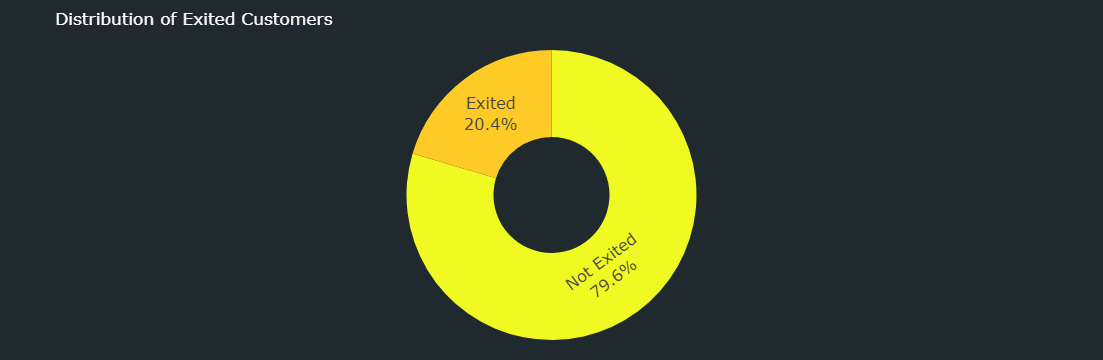

In [63]:
values = df.Exited.value_counts()
labels = ['Not Exited', 'Exited']

fig = px.pie(
    values=values,
    names=labels,
    title='Distribution of Exited Customers',
    hole=0.4,  # Slightly larger hole for better readability
    color_discrete_sequence=px.colors.sequential.Plasma_r,  # Dark color scheme
)

# Customize appearance for clarity
fig.update_traces(
    textinfo='percent+label',
    textfont_size=16,  # Larger text for dark theme
)

# Refine layout for dark theme
fig.update_layout(
    plot_bgcolor='#232F34',  # Dark background
    paper_bgcolor='#1F292E',  # Dark surrounding area
    font_color='white',  # White text for contrast
    margin=dict(l=20, r=20, t=50, b=20),  # Adjusted margins
    showlegend=False,
)

fig.show()

In [62]:

fig = px.pie(
    values=values,
    names=labels,
    title='Distribution of Exited Customers',
    hole=0.4,  # Slightly larger hole for better readability
    color_discrete_sequence=px.colors.sequential.Plasma_r,  # Dark color scheme
    plot_bgcolor='',  # Dark background hex color
    paper_bgcolor='',  # Dark surrounding area hex color
    font_color='white',  # White text for contrast
    margin=dict(l=20, r=20, t=50, b=20),  # Adjusted margins
    showlegend=False,  # Remove unnecessary legend
)

fig.update_traces(
    textinfo='percent+label',
    textfont_size=16,  # Larger text for dark theme
)

fig.show()

TypeError: pie() got an unexpected keyword argument 'plot_bgcolor'

In [8]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [9]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [10]:
print(y)

[1 0 1 ... 1 1 0]


<a id = '0.11'></a>
<p style = "font-size : 25px; color : #ff0099; font-family : 'Comic Sans MS'; "><strong>Encoding Categorical Data</strong></p> 

Label Encoding the "Gender" column

In [11]:
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [12]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [13]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [14]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


<a id = '0.11'></a>
<p style = "font-size : 25px; color : #ff0099; font-family : 'Comic Sans MS'; "><strong>Splitting the Dataset into the Training and Test set</strong></p> 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
print(X_train)
print(X_train.shape)

[[0.0 0.0 1.0 ... 1 0 163830.64]
 [0.0 1.0 0.0 ... 1 1 57098.0]
 [1.0 0.0 0.0 ... 1 0 185630.76]
 ...
 [1.0 0.0 0.0 ... 1 0 181429.87]
 [0.0 0.0 1.0 ... 1 1 148750.16]
 [0.0 1.0 0.0 ... 1 0 118855.26]]
(8000, 12)


In [17]:
print(X_test)
print(X_test.shape)

[[0.0 1.0 0.0 ... 1 1 192852.67]
 [1.0 0.0 0.0 ... 1 0 128702.1]
 [0.0 0.0 1.0 ... 1 1 75732.25]
 ...
 [0.0 0.0 1.0 ... 1 0 141533.19]
 [0.0 1.0 0.0 ... 1 1 11276.48]
 [0.0 1.0 0.0 ... 1 0 192950.6]]
(2000, 12)


In [18]:
print(y_train)
print(y_train.shape)

[0 0 0 ... 0 0 1]
(8000,)


In [19]:
print(y_test)
print(y_test.shape)

[0 1 0 ... 0 0 0]
(2000,)


<a id = '0.11'></a>
<p style = "font-size : 25px; color : #ff0099; font-family : 'Comic Sans MS'; "><strong>Load Dataset</strong></p> 

### Feature Scaling

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<a id = '0.1'></a>
<p style = "font-size : 40px; color : #f9858b ; font-family : 'Calibri'; text-align : center; background-color : #bdfff6; border-radius: 5px 5px;"><strong>Importing Libraries</strong></p> 

## 2 - Building the ANN

<a id = '0.11'></a>
<p style = "font-size : 25px; color : #ff0099; font-family : 'Comic Sans MS'; "><strong>Load Dataset</strong></p> 

### Initializing the ANN

In [21]:
ann = tf.keras.models.Sequential()

<a id = '0.11'></a>
<p style = "font-size : 25px; color : #ff0099; font-family : 'Comic Sans MS'; "><strong>Load Dataset</strong></p> 

### Adding the input layer and the first hidden layer

In [22]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

<a id = '0.11'></a>
<p style = "font-size : 25px; color : #ff0099; font-family : 'Comic Sans MS'; "><strong>Load Dataset</strong></p> 

### Adding the second hidden layer

In [23]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

<a id = '0.11'></a>
<p style = "font-size : 25px; color : #ff0099; font-family : 'Comic Sans MS'; "><strong>Load Dataset</strong></p> 


### Adding the output layer

In [24]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

<a id = '0.1'></a>
<p style = "font-size : 40px; color : #f9858b ; font-family : 'Calibri'; text-align : center; background-color : #bdfff6; border-radius: 5px 5px;"><strong>Importing Libraries</strong></p> 

## 3 - Training the ANN

<a id = '0.11'></a>
<p style = "font-size : 25px; color : #ff0099; font-family : 'Comic Sans MS'; "><strong>Load Dataset</strong></p> 

### Compiling the ANN

In [25]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

<a id = '0.11'></a>
<p style = "font-size : 25px; color : #ff0099; font-family : 'Comic Sans MS'; "><strong>Load Dataset</strong></p> 

### Training the ANN on the Training set

In [36]:
model = ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3320 - accuracy: 0.8633
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3318 - accuracy: 0.8634
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3321 - accuracy: 0.8633
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3319 - accuracy: 0.8620
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3316 - accuracy: 0.8651
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3323 - accuracy: 0.8637
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3321 - accuracy: 0.8646
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3319 - accuracy: 0.8639
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3314 - accuracy: 0.8641
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3317 - accura

<a id = '0.1'></a>
<p style = "font-size : 40px; color : #f9858b ; font-family : 'Calibri'; text-align : center; background-color : #bdfff6; border-radius: 5px 5px;"><strong>Importing Libraries</strong></p> 

## 4 - Making the predictions and evaluating the model

<a id = '0.11'></a>
<p style = "font-size : 25px; color : #ff0099; font-family : 'Comic Sans MS'; "><strong>Load Dataset</strong></p> 

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer?

**Solution**

In [27]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 144ms/step
[[False]]


In [28]:
print(int(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5))

1/1 [==============================] - 0s 35ms/step
0


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

<a id = '0.11'></a>
<p style = "font-size : 25px; color : #ff0099; font-family : 'Comic Sans MS'; "><strong>Load Dataset</strong></p> 

### Predicting the Test set results

In [29]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


<a id = '0.11'></a>
<p style = "font-size : 25px; color : #ff0099; font-family : 'Comic Sans MS'; "><strong>Load Dataset</strong></p> 

### Making the Confusion Matrix

In [30]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1505   90]
 [ 200  205]]


0.855

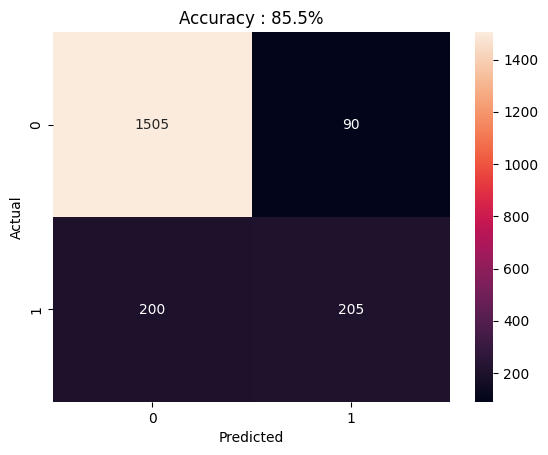

In [31]:
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Accuracy : {accuracy_score(y_test, y_pred) * 100}%')
plt.show()